In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
size = (224,224,3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), input_shape = size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               11944064  
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [ ]:
optm = opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
train_route = "/content/gdrive/My Drive/Colab Notebooks/Datasets/X_ray/Datasets/chest_xray/train"
test_route = "/content/gdrive/My Drive/Colab Notebooks/Datasets/X_ray/Datasets/chest_xray/test"

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_generator.flow_from_directory(train_route,
                                                   target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
testing_set = test_generator.flow_from_directory(test_route,
                                                target_size=(224,224),batch_size=32,class_mode='categorical')

Found 624 images belonging to 2 classes.


In [ ]:
len(training_set)

163

In [ ]:
len(testing_set)

20

In [ ]:
#Early_stp = EarlyStopping(patience = 5,
#                          restore_best_weights = True,monitor='val_loss')

In [ ]:
start = model.fit(training_set,validation_data=testing_set,
                            epochs=10,steps_per_epoch=163,
                            validation_steps=20)

Epoch 1/10
163/163 [==============================] - 385s 2s/step - loss: 0.4125 - accuracy: 0.8167 - val_loss: 0.3973 - val_accuracy: 0.8429
Epoch 2/10
163/163 [==============================] - 395s 2s/step - loss: 0.2024 - accuracy: 0.9151 - val_loss: 0.3198 - val_accuracy: 0.8894
Epoch 3/10
163/163 [==============================] - 393s 2s/step - loss: 0.1864 - accuracy: 0.9267 - val_loss: 0.3300 - val_accuracy: 0.8814
Epoch 4/10
163/163 [==============================] - 379s 2s/step - loss: 0.1699 - accuracy: 0.9285 - val_loss: 0.2943 - val_accuracy: 0.8894
Epoch 5/10
163/163 [==============================] - 388s 2s/step - loss: 0.1579 - accuracy: 0.9379 - val_loss: 0.2940 - val_accuracy: 0.8894
Epoch 6/10
163/163 [==============================] - 386s 2s/step - loss: 0.1816 - accuracy: 0.9257 - val_loss: 0.3656 - val_accuracy: 0.8814
Epoch 7/10
163/163 [==============================] - 381s 2s/step - loss: 0.1539 - accuracy: 0.9381 - val_loss: 0.5072 - val_accuracy: 0.8526

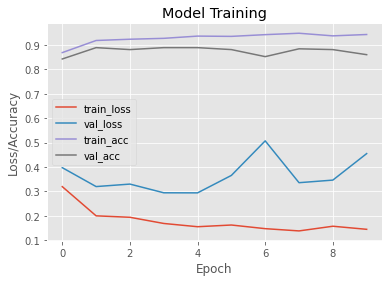

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(start.history["loss"], label="train_loss")
plt.plot(start.history["val_loss"], label="val_loss")
plt.plot(start.history["accuracy"], label="train_acc")
plt.plot(start.history["val_accuracy"], label="val_acc")
plt.title("Model Training")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/cnn.png")
model.save('/content/gdrive/My Drive/Colab Notebooks/cnn_model.h5')

<Figure size 432x288 with 0 Axes>